In [61]:
import os
import matplotlib.lines as mlines
from df_utils import create_df
import matplotlib.pyplot as plt
import numpy as np

In [62]:
effort_models = ["zero_effort", "dc_effort_w1", "jac_effort_w1", "ctc_effort_w1", "armmovementpaper_effort"]
markers = {"no_bonus": "+", "hit_bonus": "o"}
variations = ["horizontal_target_area", "smaller_targets", "reach_envelope", "Distractor"]
variant_names = ["Default", "Transverse", "Small targets", "Limits", "Mapping"]
fontsize = 15
all_variants = ["default"] + variations
cmap = plt.get_cmap('plasma')  # 'coolwarm', 'plasma'
values = np.linspace(0, len(all_variants), len(all_variants)) 
colors = {key: cmap(v / (len(all_variants))) for key, v in zip(all_variants, values)}
plt.rcParams.update({'font.size': fontsize})

In [63]:
#read data
folder = os.path.abspath(f"../../simulators/")
sparse_df = {}
sparse_df["default"], _ = create_df(["hit_bonus"], ["zero_effort"], ["dist"], folder, run_nr=1, task = "pointing")

for v in variations:
    sparse_df[v], _ = create_df(["hit_bonus"], ["zero_effort"], ["dist"], folder, run_nr=1, task = "pointing", variation=v)

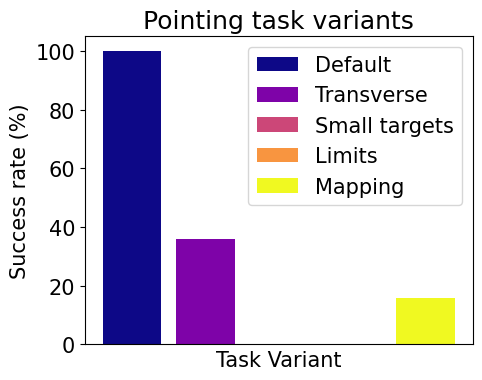

In [64]:
fig, ax = plt.subplots(figsize=(5, 4))

for i in range(len(all_variants)):
    ax.bar(i, sparse_df[all_variants[i]]['success_rate'].mean()*10, label=variant_names[i], color=colors[all_variants[i]])

plt.title("Pointing task variants")
plt.legend()
plt.yticks(fontsize=fontsize)
plt.xticks([])
plt.xlabel("Task Variant", fontsize=fontsize)
plt.ylabel("Success rate (%)", fontsize=fontsize)
plt.savefig("pointing_variants/success_rates_bonus_dist", bbox_inches='tight')

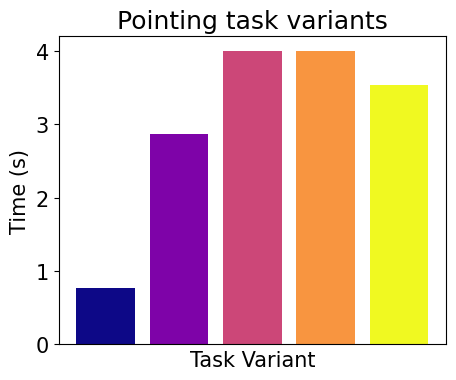

In [65]:
fig, ax = plt.subplots(figsize=(5, 4))

for i in range(len(all_variants)):
    ax.bar(i, sparse_df[all_variants[i]]['task_completion_time'].mean(), label=all_variants[i], color=colors[all_variants[i]])

plt.title("Pointing task variants")
plt.yticks(fontsize=fontsize)
plt.xticks([])
plt.xlabel("Task Variant", fontsize=fontsize)
plt.ylabel("Time (s)", fontsize=fontsize)
plt.savefig("pointing_variants/task_completion_time_bonus_dist", bbox_inches='tight')

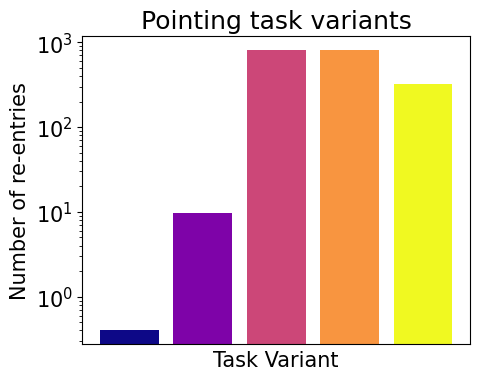

In [66]:
fig, ax = plt.subplots(figsize=(5, 4))

for i in range(len(all_variants)):
    ax.bar(i, sparse_df[all_variants[i]]['deviation_count'].mean(), label=all_variants[i], color=colors[all_variants[i]])

plt.title("Pointing task variants")
plt.yticks(fontsize=fontsize)
plt.xticks([])
plt.yscale("log")
plt.xlabel("Task Variant", fontsize=fontsize)
plt.ylabel("Number of re-entries", fontsize=fontsize)
plt.savefig("pointing_variants/deviation_count_bonus_dist", bbox_inches='tight')

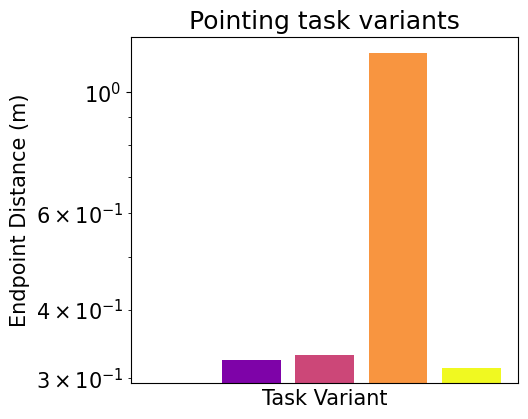

In [68]:
fig, ax = plt.subplots(figsize=(5, 4.5))

for i in range(len(all_variants)):
    ax.bar(i, sparse_df[all_variants[i]]['end_point_distances'].mean(), label=all_variants[i], color=colors[all_variants[i]])

plt.title("Pointing task variants")
plt.yticks(fontsize=fontsize)
plt.xticks([])
plt.yscale("log")
plt.xlabel("Task Variant", fontsize=fontsize)
plt.ylabel("Endpoint Distance (m)", fontsize=fontsize)
plt.savefig("pointing_variants/end_point_distances_bonus_dist", bbox_inches='tight')